In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
class Environment():
    def __init__(self):
        self.q = np.random.normal(loc=0, scale=1, size=10)
    def step(self, action):
        reward = self.q[action]
        return reward
    def reset(self):
        self.q = np.random.normal(loc=0, scale=1, size=10)

class AgentConstant():
    def __init__(self, epsilon, alpha):
        self.epsilon = epsilon
        self.alpha = alpha
        self.total_reward = 0
        self.Q = np.zeros(10)
        self.average_reward = 0
        self.step_to_average_reward = None
    def reset(self):
        self.total_reward = 0
        self.Q = np.zeros(10)
        self.average_reward = 0
        self.step_to_average_reward = None
    def policy(self):
        if np.random.rand() > self.epsilon:
            return np.argmax(self.Q)
        else:
            return np.random.randint(10)
    def train(self, num_steps, env):
        self.step_to_average_reward = np.zeros(num_steps)
        for i in range(num_steps):
            action = self.policy()
            reward = env.step(action)
            self.Q[action] += self.alpha*(reward-self.Q[action])
            
            self.average_reward += (reward - self.average_reward)/(i+1)
            self.step_to_average_reward[i] = self.average_reward
            
            # a different way of computing the average reward. Doesn't change anything
            #self.total_reward += reward
            #self.step_to_average_reward[i] = self.total_reward / (i+1)
    def get_average_rewards(self):
        return self.step_to_average_reward
        

In [3]:
num_steps=int(1e3)
num_agents=2000
Y = np.zeros((num_agents,num_steps)) # average reward at every step, for every agent

env = Environment()
agent = AgentConstant(epsilon=0.1, alpha=0.1)

for i in tqdm(range(num_agents)):
    agent.reset()
    env.reset()
    agent.train(num_steps, env)
    Y[i] = agent.get_average_rewards()

100%|██████████| 2000/2000 [00:08<00:00, 226.25it/s]


In [4]:
x = np.arange(num_steps)
y = np.zeros(num_steps)
for i in range(0,num_steps):
    y[i] = np.mean(Y[:,i])

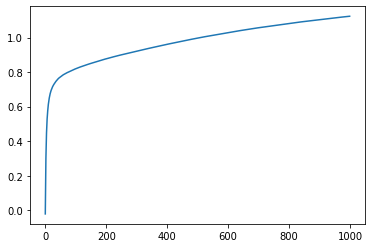

In [5]:
plt.plot(x,y)